In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Generate clusters

In [63]:
x_dim = 2; num_clusters = 5; samples = 10**4

In [71]:
mu = []

for i in range(num_clusters):
    centroid = 10*np.random.randn(x_dim,1)
    print(f'Cluster {i+1} centroid: {centroid}')
    mu.append(centroid)

Cluster 1 centroid: [[21.51654624]
 [-1.60250575]]
Cluster 2 centroid: [[10.56163987]
 [10.93862382]]
Cluster 3 centroid: [[  3.74816694]
 [-16.805224  ]]
Cluster 4 centroid: [[-17.54885085]
 [ -3.53841363]]
Cluster 5 centroid: [[-15.31069114]
 [  6.93868762]]


In [72]:
cluster = []

for i in range(num_clusters):
    cluster.append(mu[i] + np.random.randn(x_dim,samples))

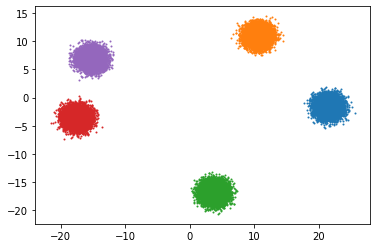

In [73]:
for i in range(num_clusters):
    plt.scatter(cluster[i][0],cluster[i][1],s=1)

plt.show()

In [74]:
X = np.concatenate(cluster, axis=1) # concatenate clusters

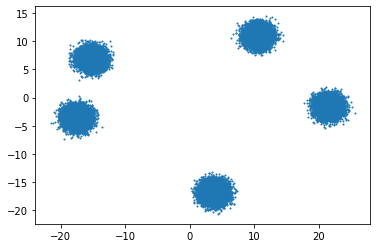

In [75]:
plt.scatter(X[0],X[1],s=1)
plt.show()

### Online algorithm

In [79]:
W = np.random.randn(num_clusters,x_dim)
theta = np.random.randn(num_clusters,1)/np.sqrt(num_clusters)
n = np.ones((num_clusters,1))
Y = np.zeros((num_clusters,num_clusters*samples))

idx = np.random.permutation(num_clusters*samples)


for t in tqdm(range(num_clusters*samples)):

    x = X[:,idx[t]].reshape((2,1))

    a = -W@x + theta

    c = np.argmin(a)
    y = np.zeros((num_clusters,1)); y[c] = 1
    z = -a[c]

    n += y

    for i in range(num_clusters):
        for j in range(x_dim):
            W[i,j] += y[i]*(2*x[j] - W[i,j])/min(n[i],100)

        theta[i] += y[i]*(z - theta[i])/min(n[i],100)

for j in range(num_clusters):
    Y[j,idx[t]] = y[j]

100%|██████████| 50000/50000 [00:21<00:00, 2293.30it/s]


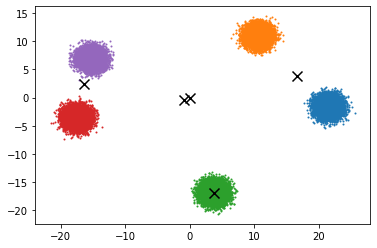

In [80]:
for i in range(num_clusters):
    plt.scatter(cluster[i][0],cluster[i][1],s=1)

for i in range(num_clusters):
    plt.scatter(W[i,0]/2,W[i,1]/2,marker='x',color='black',s=100)

plt.show()